In [2]:
import numpy as np

In [3]:
import matplotlib.pylab as plt

In [4]:
import random

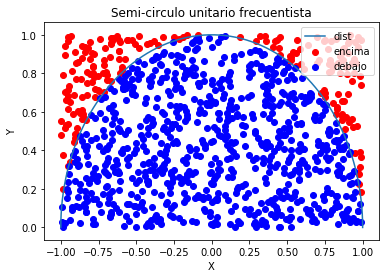

In [5]:
#Circulo unitario frecuentista

x = np.random.rand(1000)*2.0 - 1.0 #randoms entre -1 y 1
y = (np.random.rand(1000)%100) #randoms entre 0 y 1

ran_fuera = np.where(x*x+y*y > 1) #rango fuera del semicirculo
x_fuera = x[ran_fuera] #selecciona xs fuera
y_fuera = y[ran_fuera] #selecciona ys fuera

ran_dentro = np.where(x*x+y*y < 1) #rango dentro del semicirculo
x_dentro = x[ran_dentro] #selecciona xs dentro
y_dentro = y[ran_dentro] #selecciona ys dentro

#angulos para plotear semicirculo
th = np.linspace(-np.pi/2, np.pi/2, 90)

#plotea
plt.figure()
plt.scatter(x_fuera,y_fuera, c = 'r', label = 'encima')
plt.scatter(x_dentro,y_dentro, c = 'b', label = 'debajo')
plt.plot(np.sin(th),np.cos(th), label = 'dist')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Semi-circulo unitario frecuentista')
plt.show()        

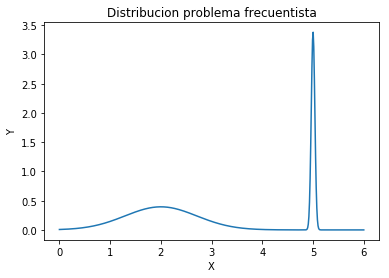

In [6]:
#Dificultades del metodo frecuentista

def funcion(x):
    
    a = 0.3/(np.sqrt(0.0025*np.pi))
    b = ((x-5.0)/0.05)**2
    c = 0.7/(np.sqrt(np.pi))
    d = (x-2.0)**2
    rta = (a*np.exp(-b)) + (c*np.exp(-d))
    return rta

x_s = np.linspace(0,6,500) #1000 puntos de 0 a 6
y_s = np.array(funcion(x_s))

plt.figure()
plt.plot(x_s,y_s)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribucion problema frecuentista')
plt.show()     

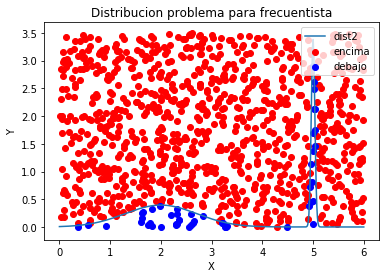

In [7]:
x_2 = (60*np.random.rand(1000))/10 #1000 randoms entre 0 y 6
y_2 = (350*np.random.rand(1000))/100 #1000 randoms entre 0 y 3.5

i = 0; #contador 
#lista donde se guarda cada coordenada encima o debajo de la funcion
x_enc = list()
y_enc = list()
x_deb = list()
y_deb = list()

while(i<1000):
    x_act = x_2[i]
    if(funcion(x_act) < y_2[i]): #pregunta si esta por encima de la funcion
        x_enc.append(x_act)
        y_enc.append(y_2[i])
    else: #si esta por debajo de la funcion 
        x_deb.append(x_act)
        y_deb.append(y_2[i])
    i= i+1
    
        
#plotea
plt.figure()
plt.scatter(x_enc,y_enc, c = 'r', label = 'encima')
plt.scatter(x_deb,y_deb, c = 'b', label = 'debajo')
plt.plot(x_s,y_s , label = 'dist2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribucion problema para frecuentista')
plt.show() 


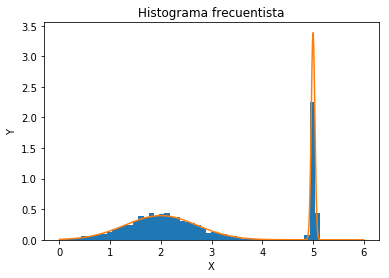

La fraccion de puntos que no es tomada en cuenta es: 95246 / 100000.0 = 95.246 %


In [81]:
#Histograma frecuencista
x_3 = (60*np.random.rand(100000))/10 #100000 randoms entre 0 y 6
y_3 = (350*np.random.rand(100000))/100 #100000 randoms entre 0 y 3.5

#lista donde se guardan los valores de x que se encunetren debajo de la funcion
x_bj = list()

i = 0 #contador
cts = 0 #contador para calcular la fraccion de puntos que se tomaron

while(i<100000):
    x_act = x_3[i]
    if( y_3[i] < funcion(x_act) ): #pregunta si esta por debajo de la funcion
        x_bj.append(x_act)
        cts = cts + 1
        
    i = i+1
    
cts_no = 100000 - cts

y_n = y_s/ (sum(y_s*(x_s[1]-x_s[0]))) #normaliza

#plotea
plt.figure()
plt.hist(x_bj, bins = 50, normed=True) #normed = true hace que la integral bajo la curva sea igual a 1 (normaliza)
plt.plot(x_s,y_n)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma frecuentista')
plt.show() 


print "La fraccion de puntos que no es tomada en cuenta es:", cts_no, "/", 100000.0 , "=", (cts_no*100.0)/100000.0, "%"


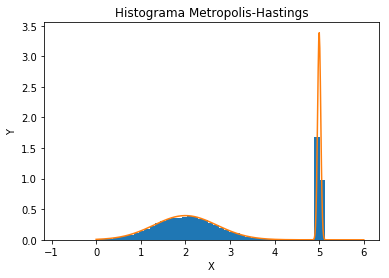

In [96]:
#Metropolis Hasting

X_walk = np.empty(100000, dtype=float) #Lista que guarda la caminata en X
x_in = (60*np.random.rand(1))/10 # Inicializa con un numero random entre 0 y 6
X_walk[0] = x_in 

rang = 100000 #Numero de numeros aleatorios a generar

i = 1
for i in range(rang):
    n_old = X_walk[i-1]
    n_new = np.random.normal(X_walk[i-1], 0.53) #Numero aleatorio perteneciente a una gaussiana de 0.53 de ancho(modificar para encontrar buena rta) 
    alfa = funcion(n_new)/funcion(n_old) #Fraccion de la funcion evaluada en el punto nuevo (sacado en base al anterior) y en anterior
    if(alfa > 1.0): #Si la fraccion en mayor a 1 es porque el punto nuevo va en camino correcto
        X_walk[i] = n_new #Lo guarda 
        
    else: #Si no se cumple en alfa
        beta = (np.random.rand(1)%100) #Se genera un nuevo random entre 0 y 1
        if(beta<=alfa): #Pregunta si el numero random es menor a alfa 
            X_walk[i] = n_new #Entonces se guarda 
        else:
            X_walk[i] = n_old #Si no se vuelve a guardar el punto viejo(en el que estoy parado)
            


plt.figure()
plt.hist(X_walk[500:], bins = 50, normed=True) #Elimina ruido de los primeros 500 pasos 
plt.plot(x_s,y_n)
plt.title("Histograma Metropolis-Hastings")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()